# Time Series Forecasting with Tensorflow and Milestone Project BitPredict 💵

Let's write some tensorflow code to predict the price of Bitcoin based on the historical price of Bitcoin data.

In [124]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

## Get data

In [125]:
# Download data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-22 09:05:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2023-09-22 09:05:24 (46.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [126]:
# Read data from csv file
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'], # Convert the 'Date' column into datetime
                 index_col=['Date'])  # Set the index column

In [127]:
# Get the first five data
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [128]:
# Get the las five data
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [129]:
# Get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [130]:
# How many samples do we have?
len(df)

2787

We have collected the historical price of Bitcoin for the past 8 years bet there's 2787 samples.

Deep learning models usually like lots of data but a smaller number of samples is something you'll often run into with time series problems.

**Note:** The seasonality of a time series dataset is referred as the number of samples per year. So, for our Bitcoin data, it has a daily seasonality because data collected per day meaning we'll get 365 samples per year.

In [131]:
# Get the only closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


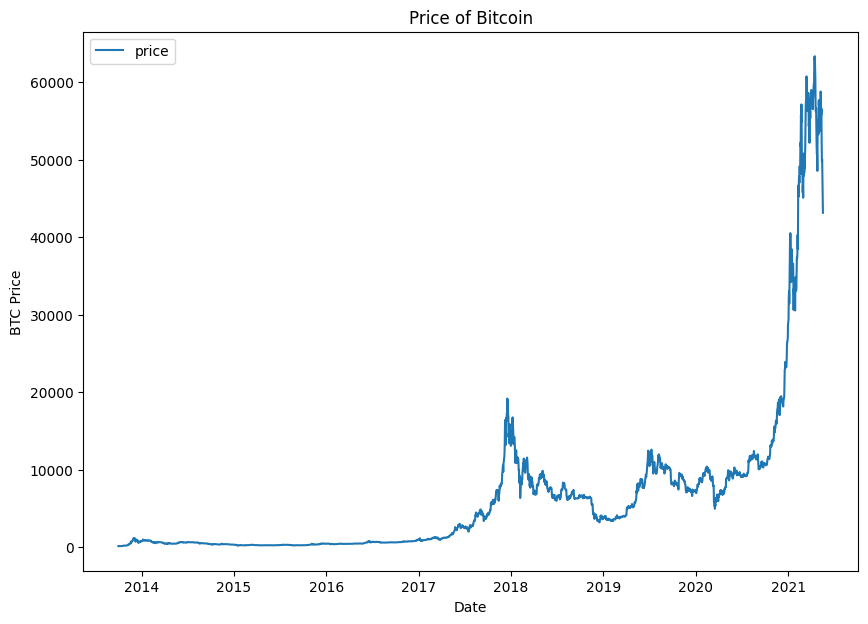

In [132]:
# Visualize the data
plt.figure(figsize=(10, 7))
plt.plot(bitcoin_prices, label='price')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title('Price of Bitcoin')
plt.legend();

## Importing time series data with Python's CSV module

In [133]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

# Create the timestaps and btc price empty list
timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # skip the header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # get the date as date format
    btc_price.append(float(line[2])) # get the closing price

# View the first ten samples
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

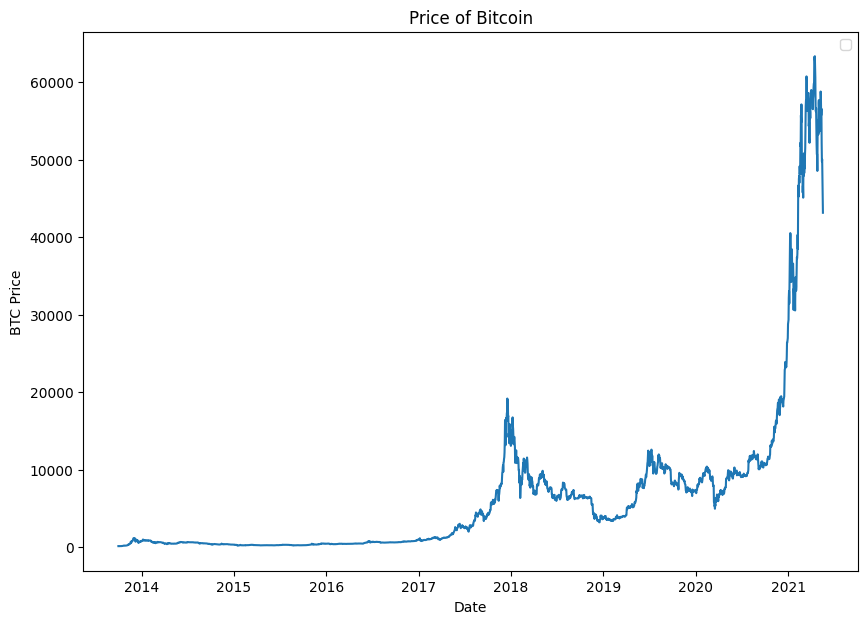

In [134]:
# Plot from CSV
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title('Price of Bitcoin')
plt.legend();

## Create train and test sets of our time series data

### Creating train and test sets with time series data (wrong way)

In [135]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [136]:
# Wrong way to make train and test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

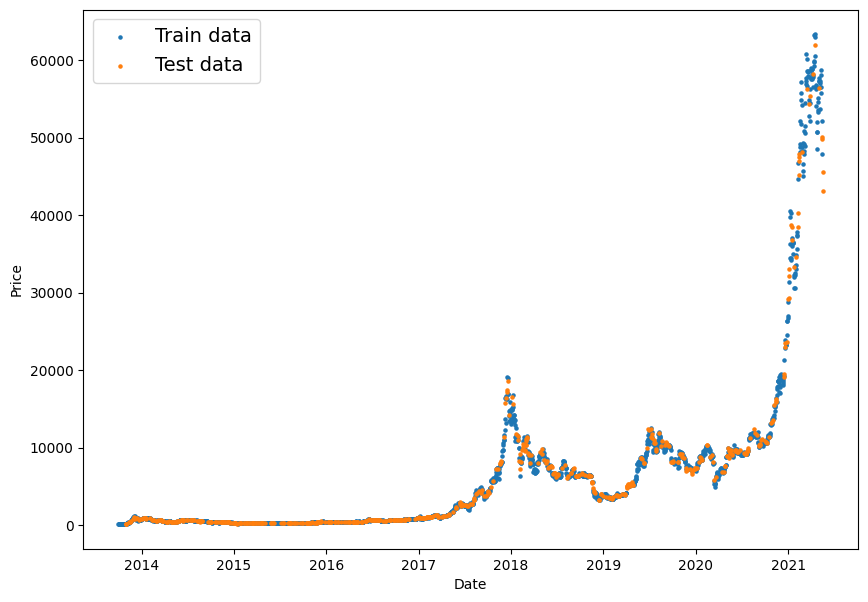

In [137]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show()

As you can see from the above plot, train and test splits have done randomly but we generally we don't want it on the time series problems because we want to predict future unseen data. Let's make this wrong split correct as below.

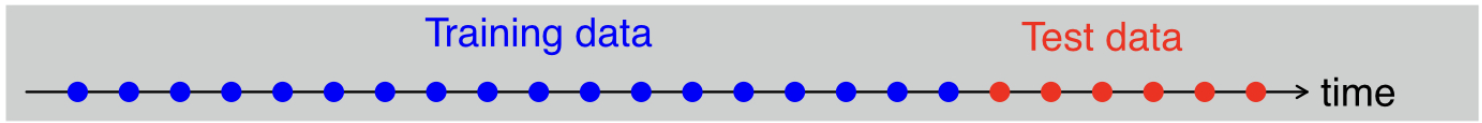

### Creating train and test sets with time series data (right way)

In [138]:
# Create train and test split the right way
split_size = int(0.8*len(prices)) # %80 train and %20 test

# Create train split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

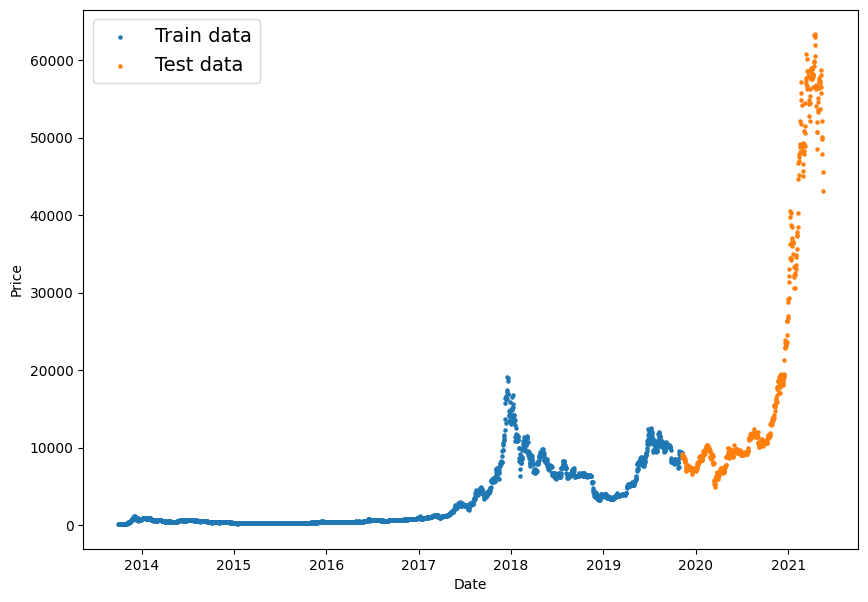

In [139]:
# Plot the split data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show()

## Create a plotting function


In [140]:
# Create a time series plotting function
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  '''
  Plots timesteps against values.

  Parameters:
    timesteps: array of timestep values
    values: array of values across time
    format: style of plot, default '.'
    start: where to start the plot
    end: where to end the plot
    label: label to show on plot about values. default=None
  '''
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

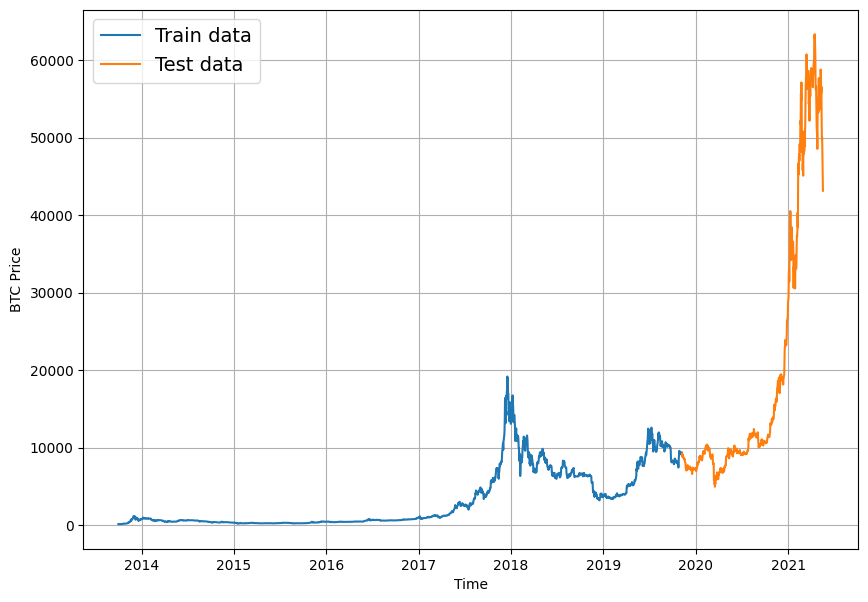

In [141]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train,
                 values=y_train,
                 start=0,
                 format='-',
                 label='Train data')

plot_time_series(timesteps=X_test,
                 values=y_test,
                 format='-',
                 label='Test data')

## Modelling Experiments

Terms to be familiar with:
 * **Horizon:** number of timesteps into the future we're going to predict
 * **Window size:** number of timesteps we're going to use to predict **horizon**

We have got Bitcoin historical data to model it. Let's run a series of modelling experiments and see which model performs best.

* 0	Naive model (baseline)
* 1	Dense model	(horizon=1, window=7)
* 2	Same as 1	(horizon=1, window=30)
* 3	Same as 1	(horizon=7, window=30)
* 4	Conv1D	(horizon=1, window=7)
* 5	LSTM	(horizon=1, window=7)
* 6	Same as 1 (but with multivariate data) (horizon=1, window=7)
* 7	N-BEATs Algorithm	(horizon=1, window=7)
* 8	Ensemble (multiple models optimized on different loss functions)	(horizon=1, window=7)
* 9	Future prediction model (model to predict future values)	(horizon=1, window=7)
* 10	Same as 1 (but with turkey data introduced)	(horizon=1, window=7)

## Model 0: Naive Forecast (Baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

This formula means that the prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [142]:
# Create a naive forecast
naive_forecast = y_test[:-1] # we want to predict last one..

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

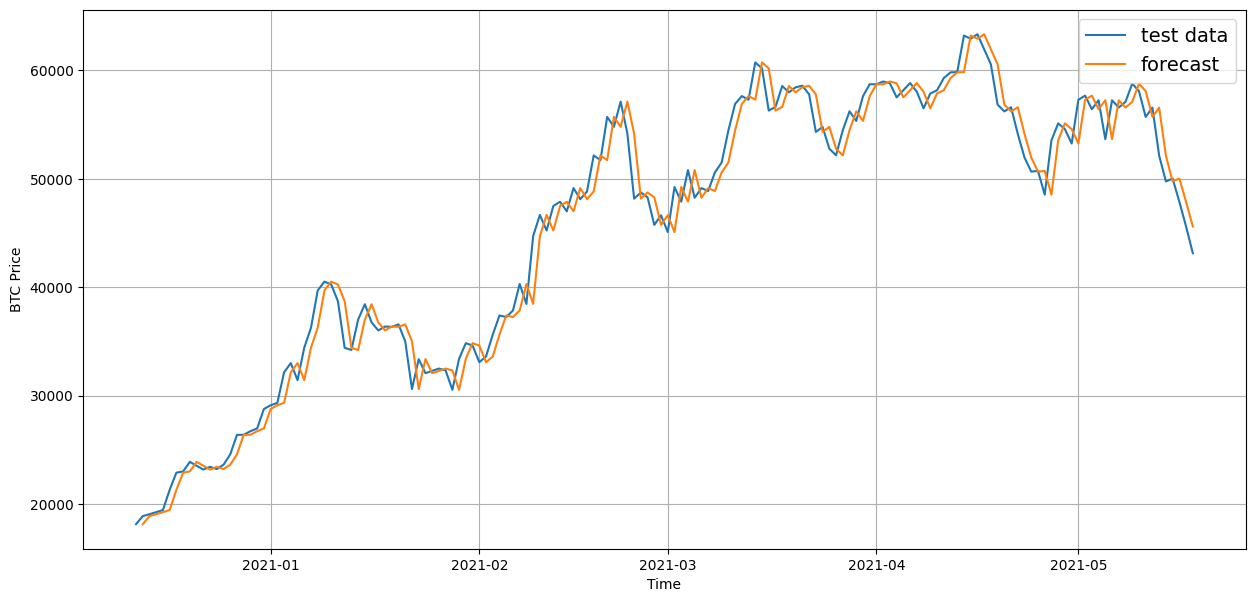

In [143]:
# Plot naive forecast
plt.figure(figsize=(15, 7))
# plot_time_series(timesteps=X_train, values=y_train, label='train data')
plot_time_series(timesteps=X_test, values=y_test, format='-', start=400, label='test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', start=400, label='forecast')

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

We're predicting a number, so thats means we have a form of regression problem. We will need some regression-like metrics because we are working on regression problem.

A few common regression metrics which can also be used for time series forecasting:
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MASE - mean absolute scaled error (only for time series)
* sMAPE - symmetric mean absolute percentage error (only for time series)

For all of the above metrics, **lower is better.**

Note: If MASE is greater than 1, it means that forecast is worse than the naive but if MASE is lower than, it means forecast is better than the naive.

Find out more about MASE and sMAPE in here: https://otexts.com/fpp3/accuracy.html

The main thing we're evaluating here is: how to our model's forecast compare against the actual values?

In [144]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  '''
  Implement MASE (assuming no seasonality of data)
  '''
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [145]:
# Get the mean absolute scaled error
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

We are so close to 1 because we already evaluate the naive model results.

In [146]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [147]:
# Get the naive results
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Datra Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

`Windowing for one week:`

`[0, 1, 2, 3, 4, 5, 6] -> [7]`

`[1, 2, 3, 4, 5, 6, 7] -> [8]`

`[2, 3, 4, 5, 6, 7, 8] -> [9]`

In [148]:
print(f"We are using this 7 data: {btc_price[:7]},\nTo predict this: {btc_price[7]}")

We are using this 7 data: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
To predict this: 123.033


In [149]:
# Setup the global variable for horizon and window size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week for the predicting next day

In [150]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  '''
  Creates labels for windowed dataset.

  E.g if horizon=1

  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  '''
  return x[:, :-horizon], x[:, -horizon:]

In [151]:
# Create an array for testing the window labelling function
test_array = tf.expand_dims(tf.range(8), axis=0)
test_array

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [152]:
# Test the window labelling function with test array
test_window, test_label = get_labelled_windows(test_array)
print(f"Window: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We have got a way to label our windowed data.

However, this only works on a small scale. We need a way to do the avove across out entire time series.

We could do this with python for loop but for large time series, that would be quite slow. To speed things up, we will leverage Numpy's array indexing.

Our function steps:

1. Create a window step of specific window size
2. Use numpy indexing to create a 2d arrat of multiple window steps
3. Uses the 2d array of multiple window steps to index on a target series
4. Uses our `get_labelled_windows()` function we created above to turn window steps into windows with a specified horizon

In [153]:
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  '''
  Turns 1D array into 2D array of sequential labelled windows of window_size with horizon size label
  '''

  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D arrat of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on the target array (a time series) with 2D array of mulitple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled window
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [154]:
# Create the all windows and labels
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [155]:
# View the first 3 windows and labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}\n")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]

Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]

Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]



Now, our problem is turned into supervised learning because we have labelled data.


In [156]:
# View the last 3 windows and labels
for i in range(1, 4):
  print(f"Window: {full_windows[-i]} -> Label: {full_labels[-i]}\n")

Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]

Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]



That's look pretty cool. We created a function that called `make_windows()` and windowed our data but we can do same thing using tensorflow and we dont need to create a function. Find out more: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into train and test sets

In [157]:
# Make the train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  '''
  Splits windows and labels into train and test splits.
  '''
  splits_size = int(len(windows) * (1-test_split)) # %80 train / %20 test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [158]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [159]:
# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we used 32)
* 100 epochs

This values just coming from experimentation.

In [160]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation same as no activation
], name='model_1_dense')

# 2. Compile the model
model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 918.6212 - mae: 918.6212 - mse: 3266580.7500    
Epoch 1: val_loss improved from inf to 2685.76050, saving model to model_experiments/model_1_dense
18/18 [==============================] - 1s 35ms/step - loss: 911.3715 - mae: 911.3715 - mse: 3214949.2500 - val_loss: 2685.7605 - val_mae: 2685.7605 - val_mse: 16878112.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 468.7091 - mae: 468.7091 - mse: 660258.4375
Epoch 2: val_loss improved from 2685.76050 to 1040.40564, saving model to model_experiments/model_1_dense
18/18 [==============================] - 0s 26ms/step - loss: 258.3485 - mae: 258.3485 - mse: 280202.9688 - val_loss: 1040.4056 - val_mae: 1040.4056 - val_mse: 3621469.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 141.6243 - mae: 141.6243 - mse: 113395.1172
Epoch 3: val_loss improved from 1040.40564 to 981.23682, saving model to model_experiments/model_1_dens

In [161]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 696.4846 - mae: 696.4846 - mse: 1465851.7500


[696.4845581054688, 696.4845581054688, 1465851.75]

This scores are the last epoch's score but what about the best performing epoch? Let's load it and evaluate the model performance.

In [162]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7211 - mae: 570.7211 - mse: 1166038.1250


[570.7210693359375, 570.7210693359375, 1166038.125]

## Making forecast with a model (on the test dataset)

To make forecast on the test data (actually, it is not forecast, they are only psuedo forecasts because actual forecast are into the future), let's wirte a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Return the predictions

In [163]:
# Create a function that makes predictions
def make_preds(model, input_data):
  '''
  Uses model to make predicitons input_data
  '''
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [164]:
# Make predictions using model_1 on the test data and view results
model_1_preds = make_preds(model=model_1,
                           input_data=test_windows)

print(f"Number of predicitions: {len(model_1_preds)}\n")
print(f"First 10 prediction: {model_1_preds[:10]}")

18/18 [==============================] - 0s 1ms/step
Number of predicitions: 551

First 10 prediction: [8727.976  8659.266  8500.701  8442.819  8518.3125 8231.143  8089.785
 8052.1743 7679.177  7292.0566]


In [165]:
# Evaluate the model_1 predictions
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # there is extra dimension so we squeeze it
                                 y_pred=model_1_preds)

model_1_results

{'mae': 570.72107,
 'mse': 1166038.1,
 'rmse': 1079.8324,
 'mape': 2.549228,
 'mase': 0.9961079}

In [166]:
# Remind the naive model's results
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

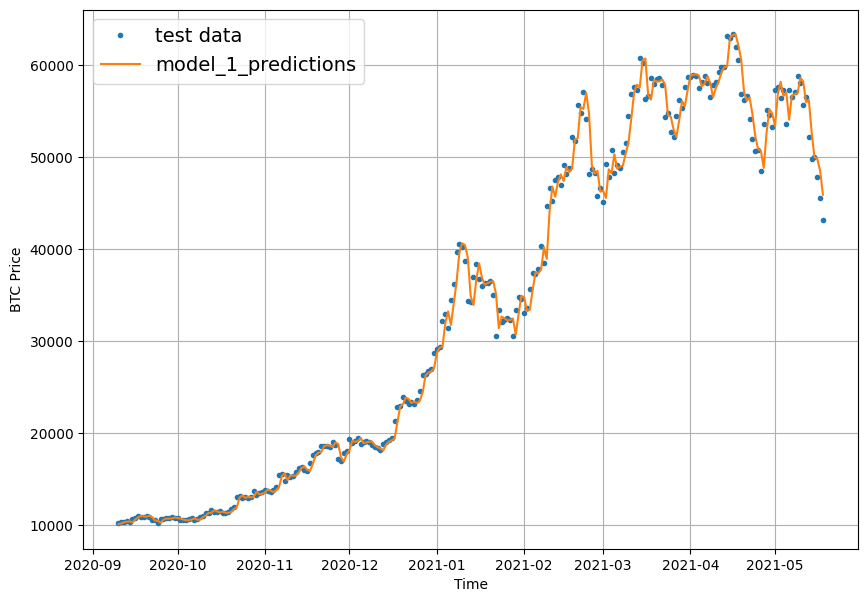

In [167]:
# Let's plot out model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label='model_1_predictions')

## Model 2: Dense model (window=30, Horizon=1)

In [168]:
HORIZON = 1 # predict one step
WINDOW_SIZE = 30 # use past 30 samples for prediction

In [169]:
# Make windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [170]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [171]:
# Check the first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [172]:
# Check the first 3 train labels
train_labels[:3]

array([[196.02499],
       [198.04883],
       [198.93233]])

In [173]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation equals to no activation
], name='model_2_dense')

# Compile the model
model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit the model 2
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 3257.38696, saving model to model_experiments/model_2_dense

Epoch 2: val_loss improved from 3257.38696 to 1162.34302, saving model to model_experiments/model_2_dense

Epoch 3: val_loss did not improve from 1162.34302

Epoch 4: val_loss did not improve from 1162.34302

Epoch 5: val_loss improved from 1162.34302 to 1105.83569, saving model to model_experiments/model_2_dense

Epoch 6: val_loss did not improve from 1105.83569

Epoch 7: val_loss improved from 1105.83569 to 1096.95068, saving model to model_experiments/model_2_dense

Epoch 8: val_loss improved from 1096.95068 to 993.82257, saving model to model_experiments/model_2_dense

Epoch 9: val_loss did not improve from 993.82257

Epoch 10: val_loss improved from 993.82257 to 949.14557, saving model to model_experiments/model_2_dense

Epoch 11: val_loss improved from 949.14557 to 921.13403, saving model to model_experiments/model_2_dense

Epoch 12: val_loss did not improve from 921.13403

Epoch 

In [174]:
# Evaluate the model 2 on test data
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 633.8142 - mae: 633.8142 - mse: 1319151.0000


[633.814208984375, 633.814208984375, 1319151.0]

In [175]:
# Load in the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 624.3572 - mae: 624.3572 - mse: 1300876.3750


[624.357177734375, 624.357177734375, 1300876.375]

In [176]:
# Get forecast predictions
model_2_preds = make_preds(model=model_2,
                           input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [177]:
# Evaluate the results of model 2
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 624.35724,
 'mse': 1300876.5,
 'rmse': 1140.5597,
 'mape': 2.741798,
 'mase': 1.0567728}

In [178]:
# Remind the model 1 results
model_1_results

{'mae': 570.72107,
 'mse': 1166038.1,
 'rmse': 1079.8324,
 'mape': 2.549228,
 'mase': 0.9961079}

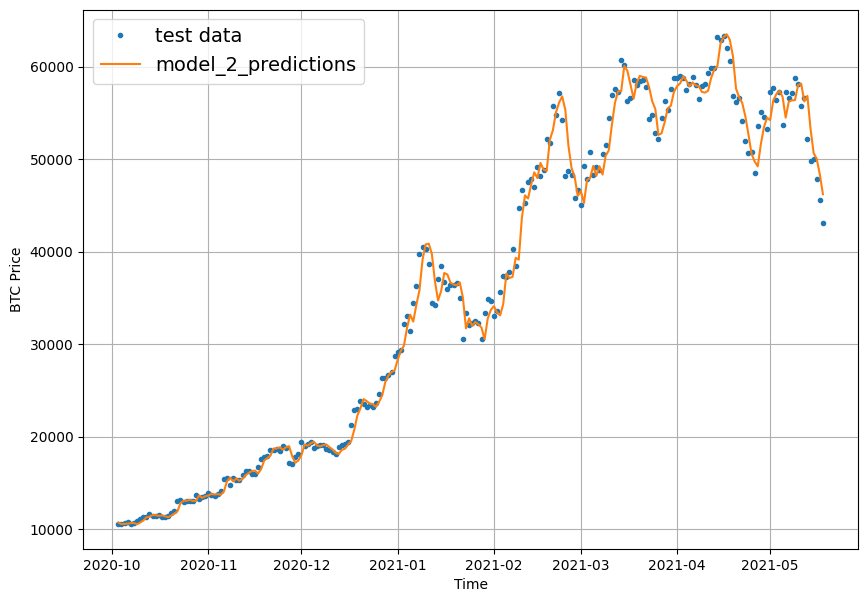

In [179]:
# Let's plot out model 2 predictions
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label='model_2_predictions')

## Model 3: Dense model (Window=30, Horizon=7)

In [180]:
HORIZON = 7 # predict one step
WINDOW_SIZE = 30 # use past 30 samples for prediction

In [181]:
# Make windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [182]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 522, 2229, 522)

In [183]:
# Check the first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [184]:
# Check the first 3 train labels
train_labels[:3]

array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333],
       [198.04883, 198.93233, 200.543  , 210.3075 , 225.02   , 248.25333,
        262.32666],
       [198.93233, 200.543  , 210.3075 , 225.02   , 248.25333, 262.32666,
        294.48699]])

In [185]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation equals to no activation
], name='model_3_dense')

# Compile the model
model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit the model 2
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 3314.53564, saving model to model_experiments/model_3_dense

Epoch 2: val_loss improved from 3314.53564 to 2297.99121, saving model to model_experiments/model_3_dense

Epoch 3: val_loss improved from 2297.99121 to 2153.39502, saving model to model_experiments/model_3_dense

Epoch 4: val_loss improved from 2153.39502 to 2124.50684, saving model to model_experiments/model_3_dense

Epoch 5: val_loss improved from 2124.50684 to 2050.27490, saving model to model_experiments/model_3_dense

Epoch 6: val_loss improved from 2050.27490 to 1930.52454, saving model to model_experiments/model_3_dense

Epoch 7: val_loss improved from 1930.52454 to 1855.36682, saving model to model_experiments/model_3_dense

Epoch 8: val_loss improved from 1855.36682 to 1730.60474, saving model to model_experiments/model_3_dense

Epoch 9: val_loss improved from 1730.60474 to 1728.40039, saving model to model_experiments/model_3_dense

Epoch 10: val_loss improved from 1728.40039

In [186]:
# Evaluate the model 3 on test data
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1337.0685 - mae: 1337.0685 - mse: 5848018.5000


[1337.0684814453125, 1337.0684814453125, 5848018.5]

In [187]:
# Load in the best performing model
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1297.7637 - mae: 1297.7637 - mse: 5680365.0000


[1297.763671875, 1297.763671875, 5680365.0]

In [188]:
# Get forecast predictions
model_3_preds = make_preds(model=model_3,
                           input_data=test_windows)

17/17 [==============================] - 0s 1ms/step


In [189]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 130.95543 ,  259.0217  ,  277.8061  ,  321.4688  ,  321.9848  ,
         205.86412 ,  224.51479 ,  291.5192  ,  174.18053 ,  252.40848 ,
         262.5143  ,  535.69073 ,   96.657715,  133.11293 ,   89.25753 ,
          96.000694,   93.327774,   46.250767,   91.89091 ,  128.15652 ,
         123.52874 ,  127.231514,  119.1808  ,  159.56396 ,  151.11021 ,
         264.2979  ,  358.53745 ,  652.23065 ,  558.10785 ,  587.2852  ,
         676.44525 ,  403.91434 ,  240.4352  ,  259.31863 ,  466.9476  ,
         441.92633 ,  459.98605 ,  553.32916 ,  553.18787 ,  148.24805 ,
         122.17132 ,  193.64565 ,  410.8676  ,  504.13016 ,  295.65082 ,
         273.42914 ,  272.6473  ,  326.86957 ,  473.9145  ,  578.6748  ,
         791.65106 ,  894.9569  ,  595.5347  ,  346.16586 ,  217.6928  ,
         209.14803 ,  235.14719 ,  225.7567  ,  337.2729  ,  429.2397  ,
         646.76965 ,  554.3721  ,  443.41504 ,  390.92746 ,  282.03668 ,
         244.00041 ,  301.41226 ,  328.32086

## Make our evaluation function work for larger horizons


In [190]:
# Make our evaluation function work for larger horizons
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [191]:
# Lets get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1297.7639,
 'mse': 5680365.5,
 'rmse': 1487.6698,
 'mape': 5.568918,
 'mase': 2.218907}

We have made and evaluated predictions with `model_3`, not its time to visualize the predictions.

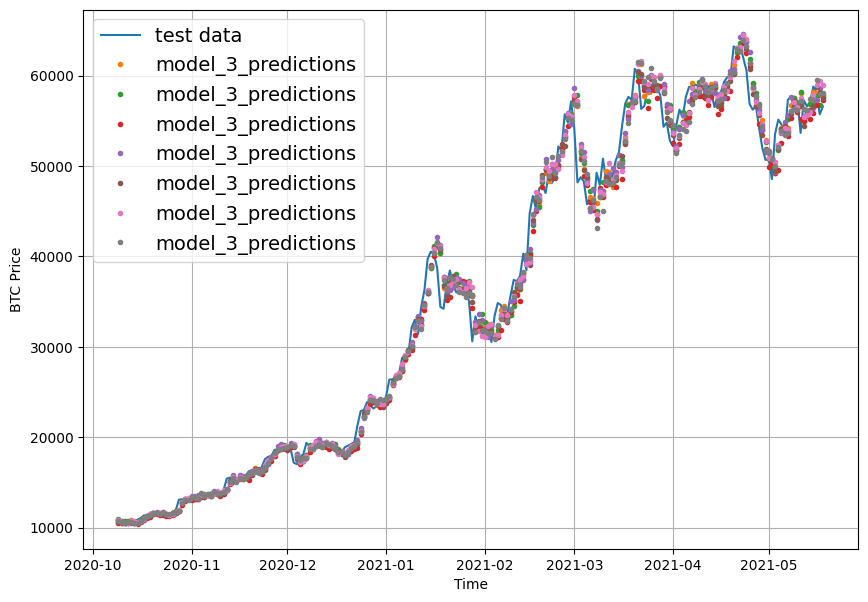

In [192]:
# Let's plot out model 3 predictions
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format='-',
                 label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label='model_3_predictions')

Our horizon is 7 that's why we have 7 different model_3_predictions. But we can use the `tf.reduce_mean()` function for get the mean of the predictions. Let's do that.

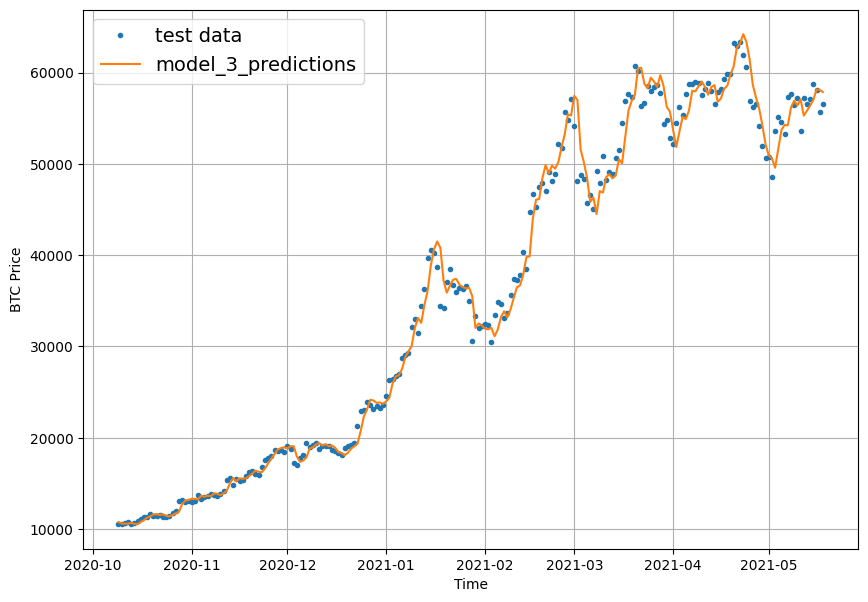

In [193]:
# Plot the model 3 predictions using reduce mean
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1), # Get the average of the 7 different predictions using tf.reduce_mean()
                 format='-',
                 start=offset,
                 label='model_3_predictions')

## Which of our model is performing the best so far?

We trained a few model until now, let's compare them which one is the best.

In [194]:
# Create a dataframe for model results
model_results = pd.DataFrame({'naive_results': naive_results,
              'horizon_1_windows_7': model_1_results,
              'horizon_1_windows_30': model_2_results,
              'horizon_7_windows_30': model_3_results}).T

model_results

,mae,mse,rmse,mape,mase
naive_results,567.980225,1147547.000,1071.236206,2.516525,0.999570
horizon_1_windows_7,570.721069,1166038.125,1079.832397,2.549228,0.996108
horizon_1_windows_30,624.357239,1300876.500,1140.559692,2.741798,1.056773
horizon_7_windows_30,1297.763916,5680365.500,1487.669800,5.568918,2.218907


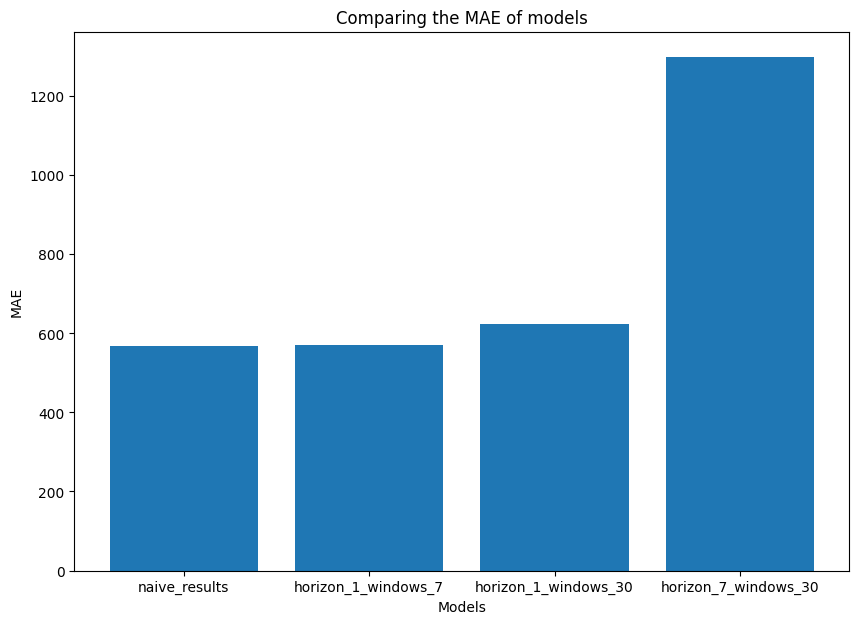

In [195]:
plt.figure(figsize=(10, 7))
plt.bar(model_results.index, model_results['mae'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparing the MAE of models');

## Model 4: Conv1D model

In [196]:
# Define the horizon and window size as global variables
HORIZON = 1
WINDOW_SIZE = 7

In [197]:
# Create windowed data
full_windows, full_labels = make_windows(prices,
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [198]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

To use Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`

However our data isn't in that shape yet.

In [199]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [202]:
# Before we pass our data to the Conv1D , we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [205]:
# Create expand the dimension layer
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension
expand_dims_layer

In [208]:
# Test our lambda layer
print(f'Original shape: {x.shape}')
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape: {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [209]:
# Set random seed
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1d')

# Compile model
model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

# Fit the model
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1: val_loss improved from inf to 972.47583, saving model to model_experiments/model_4_conv1d

Epoch 2: val_loss improved from 972.47583 to 940.07751, saving model to model_experiments/model_4_conv1d

Epoch 3: val_loss improved from 940.07751 to 912.75311, saving model to model_experiments/model_4_conv1d

Epoch 4: val_loss improved from 912.75311 to 908.05896, saving model to model_experiments/model_4_conv1d

Epoch 5: val_loss improved from 908.05896 to 798.68372, saving model to model_experiments/model_4_conv1d

Epoch 6: val_loss did not improve from 798.68372

Epoch 7: val_loss improved from 798.68372 to 749.74683, saving model to model_experiments/model_4_conv1d

Epoch 8: val_loss improved from 749.74683 to 737.22119, saving model to model_experiments/model_4_conv1d

Epoch 9: val_loss improved from 737.22119 to 702.50201, saving model to model_experiments/model_4_conv1d

Epoch 10: val_loss did not improve from 702.50201

Epoch 11: val_loss improved from 702.50201 to 677.01508,

In [210]:
# Evaluate the model on the test data
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 611.5350 - mae: 611.5350 - mse: 1244656.1250


[611.5349731445312, 611.5349731445312, 1244656.125]

In [211]:
# Load in evaluate the best performing model
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1d')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 569.1342 - mae: 569.1342 - mse: 1168573.5000


[569.1342163085938, 569.1342163085938, 1168573.5]

In [213]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8728.301 , 8658.922 , 8502.699 , 8444.569 , 8509.873 , 8239.873 ,
       8099.114 , 8056.255 , 7672.1357, 7298.1587], dtype=float32)>

In [214]:
# Evaluate preds
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.1342,
 'mse': 1168573.5,
 'rmse': 1081.0057,
 'mape': 2.5327747,
 'mase': 0.9933383}